In [1]:
#importing all libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
%matplotlib inline 

#change directory to the folder where data files are present
#This step is not necessary if the data files and jupyter notebook are in same folder

# os.chdir(r"C:\Users\Downloads\Compressed\ml-latest-small")

#  Import and read the charity_data.csv.
#import pandas as pd 
#application_df = pd.read_csv("./Resources/charity_data.csv")
#3application_df.head()

#import ratings file in a pandas dataframe
ratings_data = pd.read_csv("./Database/ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [2]:
#import movies file in a pandas dataframe

movie_names=pd.read_csv("./Database/movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movie_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
# No null values!

In [3]:
# merge movie and ratings files in a panda dataframe

movie_data=pd.merge(ratings_data,movie_names,on='movieId')
movie_data.head()


,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [4]:
#creating a dataframe for data analysis
trend=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 
trend.head()

,rating,total number of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.896648,179
#1 Cheerleader Camp (2010),2.111111,9
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.666667,3


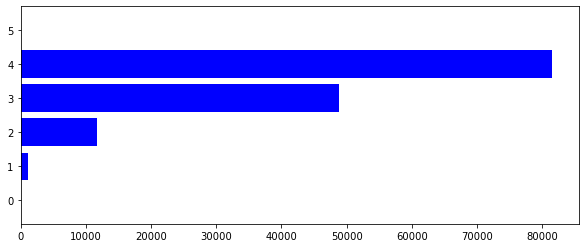

In [5]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

C:\Users\dougl\AppData\Local\Temp/ipykernel_19576/3045345650.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")


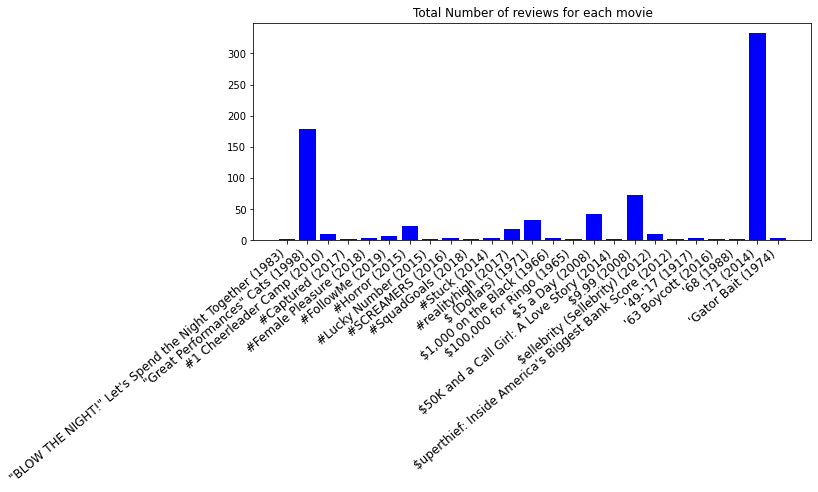

In [6]:
# Ploting a bar graph describing number of reviews for first 25 movies
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='b')
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

In [7]:
# Calculating mean rating of all movies and check the popular high rating movies
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Full of Grace (2015)              5.0
Geordie (1955)                    5.0
Garfield In Paradise (1986)       5.0
Lost Woods (2012)                 5.0
Garfield in the Rough (1984)      5.0
Lost Time (2014)                  5.0
Who Killed Chea Vichea? (2010)    5.0
Lost Rivers (2013)                5.0
Who Killed Johnny (2013)          5.0
Generation Baby Buster (2011)     5.0
Name: rating, dtype: float64